<a href="https://colab.research.google.com/github/tackulus/204426/blob/main/Lab_08_610510531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Workshop 8: Data Exploration and Visualization (Numeric Data)**
**คำสั่ง**

1.   ศึกษาวิธีการสำรวจลักษณะการกระจายของข้อมูลเชิงตัวเลขด้วยค่าสถิติเชิงพรรณนาและการแสดงภาพข้อมูล
2.   ทำโจทย์ปฏิบัติการแต่ละข้อตามคำสั่ง
3.   ตั้งชื่อไฟล์ python notebook นี้ในรูปแบบ Lab_06_XXXXXXXXX.ipynb โดย XXXXXXXXX คือ รหัสนักศึกษา
4.   ทำการดาวน์โหลดและส่งไฟล์ Lab_08_XXXXXXXXX.ipynb ที่เว็บไซต์ http://hw.cs.science.cmu.ac.th 

In [1]:
!git clone https://github.com/tackulus/204426.git

Cloning into '204426'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 96 (delta 42), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (96/96), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
import seaborn as sns

In [4]:
# load breast cancer data 
df = pd.read_csv("/content/204426/dataset/breast_cancer_data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Describe the distribution shape using descriptive statistice**

In [38]:
def descriptive_statistic(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    dct = {
        "Mean": df[col].mean(),
        "Median": df[col].median(),
        "Mode": [i for i in df[col].mode()],
        "SD": df[col].std(),
        "Variance": df[col].var(),
        "Kurtosis": df[col].kurt(),
        "Excess kurtosis": df[col].kurt() - 3,
        "Skewness": df[col].skew(),
        "IQR": IQR,
        "Lower limit": df[col].quantile(0.25) - 1.5 * IQR,
        "Upper limit": df[col].quantile(0.75) + 1.5 * IQR
    }

    print(col)
    print("----------------------------------------")
    for key,val in dct.items(): print(f"{key:15} = {val:}")

descriptive_statistic(df, "radius_mean")

radius_mean
----------------------------------------
Mean            = 14.127291739894563
Median          = 13.37
Mode            = [12.34]
SD              = 3.524048826212078
Variance        = 12.418920129526725
Kurtosis        = 0.8455216229065377
Excess kurtosis = -2.1544783770934623
Skewness        = 0.9423795716730992
IQR             = 4.08
Lower limit     = 5.579999999999999
Upper limit     = 21.9


ปฏิบัติการข้อ 1) จงอธิบายลักษณะการกระจายของค่าตัวแปร area_mean ด้วยค่าสถิติเชิงพรรณนา

In [37]:
# Answer here!
descriptive_statistic(df, "area_mean")

area_mean
----------------------------------------
Mean            = 654.8891036906857
Median          = 551.1
Mode            = [512.2]
SD              = 351.9141291816527
Variance        = 123843.55431768096
Kurtosis        = 3.6523027623507582
Excess kurtosis = 0.6523027623507582
Skewness        = 1.6457321756240424
IQR             = 362.40000000000003
Lower limit     = -123.30000000000001
Upper limit     = 1326.3000000000002


ปฏิบัติการข้อ 2) จงเขียนฟังก์ชันเพื่อตรวจหาค่าผิดปรกติของค่าตัวแปรหนึ่งๆ

In [41]:
# Answer here!
def potential_outliers(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    Lower_limit = df[col].quantile(0.25) - 1.5 * IQR
    Upper_limit = df[col].quantile(0.75) + 1.5 * IQR
    return df[((df[col] < Lower_limit) | (df[col] > Upper_limit))]

ปฏิบัติการข้อ 3) จงเรียกใช้ฟังก์ในข้อ 2 เพื่อตรวจหาค่าของตัวแปร radius_mean ที่อาจเป็นข้อมูลผิดปรกติ

In [42]:
# Answer here!
potential_outliers(df, "radius_mean")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
82,8611555,M,25.22,24.91,171.5,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,NaN
108,86355,M,22.27,19.67,152.8,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,NaN
122,865423,M,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009,NaN
164,8712289,M,23.27,22.04,152.1,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,0.05553,0.6642,0.8561,4.603,97.85,0.004910,0.02544,0.02822,0.01623,0.01956,0.003740,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187,NaN
180,873592,M,27.22,21.87,182.1,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,0.05770,0.8361,1.4810,5.820,128.70,0.004631,0.02537,0.03109,0.01241,0.01575,0.002747,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082,NaN
202,878796,M,23.29,26.67,158.9,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,0.06229,0.5539,1.5600,4.667,83.16,0.009327,0.05121,0.08958,0.02465,0.02175,0.005195,25.12,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762,NaN
212,8810703,M,28.11,18.47,188.5,2499.0,0.11420,0.1516,0.3201,0.15950,0.1648,0.05525,2.8730,1.4760,21.980,525.60,0.013450,0.02772,0.06389,0.01407,0.04783,0.004476,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,NaN
236,88299702,M,23.21,26.97,153.5,1670.0,0.09509,0.1682,0.1950,0.12370,0.1909,0.06309,1.0580,0.9635,7.247,155.80,0.006428,0.02863,0.04497,0.01716,0.01590,0.003053,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677,NaN
339,89812,M,23.51,24.27,155.1,1747.0,0.10690,0.1283,0.2308,0.14100,0.1797,0.05506,1.0090,0.9245,6.462,164.10,0.006292,0.01971,0.03582,0.01301,0.01479,0.003118,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738,NaN
352,899987,M,25.73,17.46,174.2,2010.0,0.11490,0.2363,0.3368,0.19130,0.1956,0.06121,0.9948,0.8509,7.222,153.10,0.006369,0.04243,0.04266,0.01508,0.02335,0.003385,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815,NaN


ปฏิบัติการข้อ 4) จงเขียนฟังก์ชันเพื่อระบุลักษณะการกระจายของค่าตัวแปรว่ามีการแจกแจงค่าตัวแปรแบบใด

In [100]:
# Answer here!
import statsmodels.api as sm
import scipy
import pylab as py

def detemine_distribution(df, col, dist=scipy.stats.distributions.norm, loc=0, scale=1):
    sm.qqplot(df[col], line='45', dist=dist, loc=loc, scale=scale)
    py.show()

ปฏิบัติการข้อ 5) จงเรียกใช้ฟังก์ชันในข้อ 3 เพื่อระบุลักษณะการกระจายของค่าตัวแปร compactness_mean

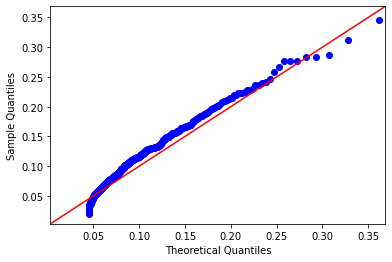

In [105]:
# Answer here!

detemine_distribution(df, "compactness_mean", scipy.stats.distributions.expon, 0.045, 0.05)

**Describe the shape of distribution by data visualizing**

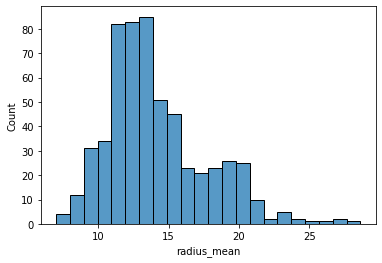

In [106]:
# Histogram
IQR_radius_mean = df.radius_mean.quantile(0.75) - df.radius_mean.quantile(0.25)
n = df.shape[0]   # number of samples
h = 2*IQR_radius_mean*(n**(-1/3))   # estimate binwidth using Freedman-Diaconis rule

sns.histplot(data=df, x="radius_mean", binwidth=h)

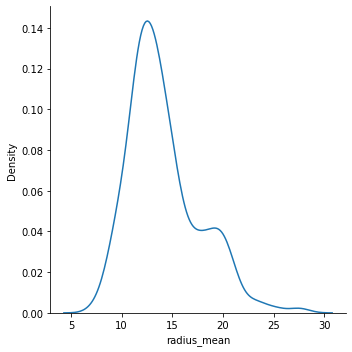

In [107]:
# Density plot
bw = 0.786*IQR_radius_mean*(n**(-1/5)) 
sns.displot(data=df, x="radius_mean", kind="kde", bw_adjust=bw)

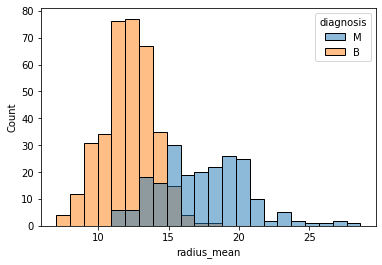

In [108]:
# Histogram with conditioning on other variables
n = df.shape[0]   # number of samples
h = 2*IQR_radius_mean*(n**(-1/3))   # estimate binwidth using Freedman-Diaconis rule

sns.histplot(data=df, x="radius_mean",  hue="diagnosis", binwidth=h)

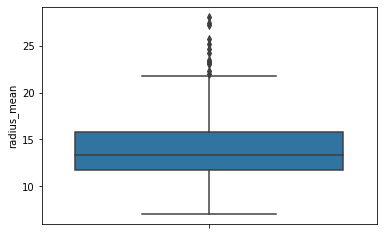

In [109]:
# Boxplot
sns.boxplot(data=df, y="radius_mean")

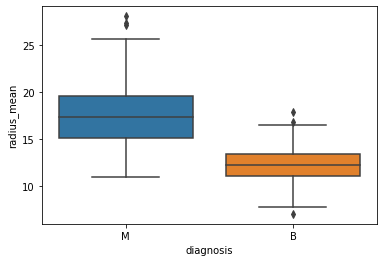

In [110]:
#compare the distributions of a variable for each category 
sns.boxplot(data=df, x="diagnosis",y='radius_mean')

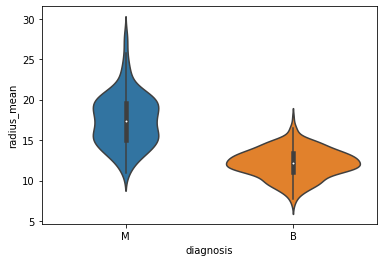

In [111]:
# Violin Plot
sns.violinplot(data=df, x="diagnosis",y='radius_mean')

ปฏิบัติการข้อ 6) จงสร้างภาพนำเสนอการกระจายของค่าข้อมูลตัวแปร area_mean

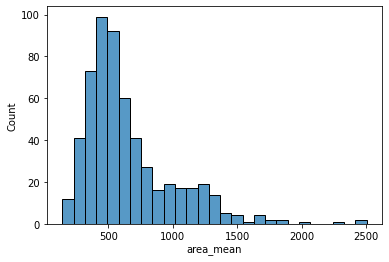

In [114]:
# Answer here!
col = "area_mean"
IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
n = df.shape[0]   # number of samples
h = 2 * IQR * (n**(-1/3))   # estimate binwidth using Freedman-Diaconis rule

sns.histplot(data=df, x=col, binwidth=h)

ปฏิบัติการข้อ 7) การกระจายของค่าตัวแปร area_mean ในผู้ป่วยที่เป็นโรคมะเร็งเต้านม และผู้ป่วยที่ไม่ได้เป็นโรคมะเร็งเต้านม มีความแตกต่างกันหรือไม่

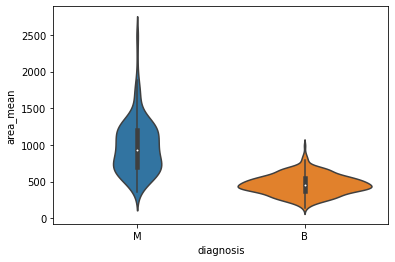

In [115]:
# Answer here!
# Different Distribution
sns.violinplot(data=df, x="diagnosis",y='area_mean')

ปฏิบัติการข้อ 8) จงเขียนฟังก์ชันแสดงค่าผิดปรกติของค่าตัวแปรหนึ่ง (var1) ในแต่ละกลุ่มข้อมูลที่แบ่งแยกด้วยค่าแปรเชิงกลุ่มอีกตัวแปรหนึ่ง (var2)

In [ ]:
def display_outliers(data, var1, var2):
    '''data is a dataframe
    var1 is the name of a variable which you want to detect outliers
    var2 is the name of a categorical variable'''
    # Answer here!

    IQR = df.groupby(var2)[var1].quantile(0.75) - df.groupby(var2)[var1].quantile(0.25)
    Lower_limit = df.groupby(var2)[var1].quantile(0.25) - 1.5 * IQR
    Upper_limit = df.groupby(var2)[var1].quantile(0.75) + 1.5 * IQR

    results = df[:0]
    for i in IQR.index:
        results.append()
    return df[((df[col] < Lower_limit) | (df[col] > Upper_limit))]

In [120]:
df.groupby("diagnosis")["radius_mean"].mean()
IQR = df.groupby("diagnosis")["radius_mean"].quantile(0.75) - df.groupby("diagnosis")["radius_mean"].quantile(0.25)
[i for i in IQR.index]

['B', 'M']

ปฏิบัติการข้อ 9) จงปรับปรุงฟังก์ชันในข้อ 8 ให้สามารถส่งข้อมูล (index ของข้อมูล) ที่มีค่าผิดปรกติกลับเป็นข้อมูลออก

In [ ]:
def detect_display_outliers(data, var1, var2):
'''data is a dataframe
  var1 is the name of a variable which you want to detect outliers
  var2 is the name of a categorical variable'''
  outliers = []
  # Answer here!

  return outliers

ปฏิบัติการข้อ 10) จงเรียกใช้ฟังก์ชันในข้อ 9 เพื่อตรวจหาค่าของตัวแปร compactness_mean ที่อาจเป็นข้อมูลผิดปรกติในแต่ละกลุ่มตามค่าตัวแปร diagnosis

In [ ]:
# Answer here!